导入模块

In [35]:
import numpy as np
import torch
#导入预处理模块
from torchvision.datasets import mnist
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
#导入优化器
import torch.nn.functional as F
import torch.optim as optim
from torch import nn
import matplotlib.pyplot as plt
from rich.progress import track
import swanlab

In [13]:

train_batchsize =64
test_batchsize =128
learning_rate =0.01
momentum=0.5
lr=0.01
all_epochs =20

In [7]:
#预处理操作:将图像数据转为Tensor张量数据
transform=transforms.Compose(
[transforms.ToTensor(), transforms.Normalize([0.5],[0.5])]
)
train_dataset = mnist.MNIST("./datasets",train=True,transform=transform,download=True)
test_dataset = mnist.MNIST("./datasets",train=True,transform=transform,download=True)
train_loader=DataLoader(train_dataset,batch_size=train_batchsize,shuffle=True)
test_loader=DataLoader(test_dataset,batch_size=test_batchsize,shuffle=True)


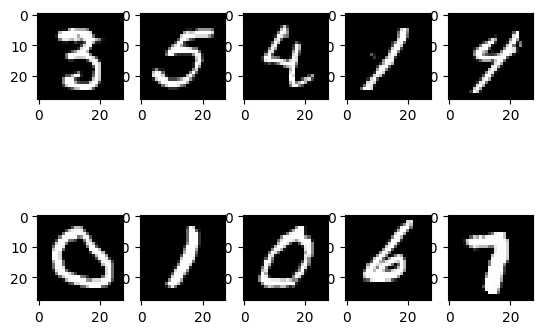

In [8]:
#取出第一个批次的数据
examples =enumerate(train_loader)
batch_idx,(example_data,example_tragets)=next(examples)
#展示
fig=plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(example_data[i][0],cmap="gray",interpolation="none")

In [9]:
class FCN(nn.Module):
    def __init__(self, input_dim,layer1,layer2,output_dim):#构造方法
        super(FCN,self).__init__() #调用父类方法
        self.FCN_layer1=nn.Sequential(nn.Linear(input_dim,layer1),nn.BatchNorm1d(layer1))
        self.FCN_layer2=nn.Sequential(nn.Linear(layer1,layer2),nn.BatchNorm1d(layer2))
        self.FCN_layer3=nn.Sequential(nn.Linear(layer2,output_dim))
    def forward(self,x):
        x=self.FCN_layer1(x)
        x=F.relu(x)
        x=self.FCN_layer2(x)
        x=F.relu(x)
        x=self.FCN_layer3(x)
        return x

In [15]:
device = torch.device("cpu")  # 指定使用 CPU
model=FCN(784,300,100,10)
model.to(device)  # 将模型移动到 CPU
#损失函数和优化器
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=lr,momentum=momentum)

In [16]:
losses=[]
accuracy=[]
eval_losses=[]
eval_accuracy=[]

In [36]:
swanlab.init(project="case_learn",experiment_name="FCN")
for epochs in track(range(all_epochs)):
    print("第"+str(epochs+1)+"轮")
    train_loss=0
    train_acc=0
    model.train()
    if epochs%5==0:
        optimizer.param_groups[0]["lr"]*=0.1
    for img ,label in train_loader:
        #img是一个批次的图像数据库
        img=img.to(device)
        label=label.to(device)
        img=img.view(img.size(0),-1)
        out=model(img)
        loss=criterion(out,label)
        #反向传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #记录误差
        train_loss+=loss.item()
        _,pred=out.max(1)
        num_correct=(pred==label).sum().item()
        acc=num_correct/img.shape[0]
        train_acc+=acc
    losses.append(train_loss/len(train_loader))
    accuracy.append(train_acc/len(train_loader))  
    print("loss："+str(train_loss/len(train_loader)))
    print("acc："+str(train_acc/len(train_loader)))

    swanlab.log({"loss":train_loss/len(train_loader), "acc":train_acc/len(train_loader)})

swanlab: Tracking run with swanlab version 0.4.8                                   
swanlab: Run data will be saved locally in d:\VIPS_projects\pytorch\case_learn\swanlog\run-20250213_203241-63f6340d
swanlab: 👋 Hi lucky_lbm, welcome to swanlab!
swanlab: Syncing run FCN to the cloud
swanlab: 🌟 Run `swanlab watch d:\VIPS_projects\pytorch\case_learn\swanlog` to view SwanLab Experiment Dashboard locally
swanlab: 🏠 View project at https://swanlab.cn/@lucky_lbm/case_learn
swanlab: 🚀 View run at https://swanlab.cn/@lucky_lbm/case_learn/runs/smtxwjiz26g5e4ogqljoj


Output()

第1轮

loss：0.24049616010903296

acc：0.9421974946695096

第2轮

loss：0.24239843954314302

acc：0.9417477345415778

第3轮

loss：0.24079840453162885

acc：0.9420642324093816

第4轮

loss：0.24051636076971158

acc：0.9417977078891258

第5轮

loss：0.24139256187593505

acc：0.9420975479744137

第6轮

loss：0.2402289076718186

acc：0.9429804104477612

第7轮

loss：0.24135944481565755

acc：0.9417643923240938

第8轮

loss：0.2404538045750498

acc：0.9420808901918977

第9轮

loss：0.2416797450372278

acc：0.941414578891258

第10轮

loss：0.2417553388980279

acc：0.9410147921108742

第11轮

loss：0.24082509174879427

acc：0.9419143123667377

第12轮

loss：0.24074863677403566

acc：0.9419642857142857

第13轮

loss：0.24132023752529994

acc：0.9417310767590619

第14轮

loss：0.24071207917384754

acc：0.9427638592750534

第15轮

loss：0.24064460985346645

acc：0.9421308635394456

第16轮

loss：0.24222270255562847

acc：0.9417477345415778

第17轮

loss：0.2408916969686302

acc：0.94144789445629

第18轮

loss：0.24065111371785847

acc：0.9425972814498934

第19轮

loss：0.2404828788851624

acc：0.9431303304904051

第20轮

loss：0.23911253221507775

acc：0.9426472547974414